In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline



from pandas import Series,DataFrame

In [71]:
# df = pd.read_csv(r'C:\Users\wei\Downloads\Sales_0625.csv',encoding='latin1')
df = pd.read_csv(r'C:\Users\wei\Downloads\archive (4)\Side Project\train_BI_0701.csv',encoding='latin1')
# "C:\Users\wei\Downloads\archive (4)\Side Project\train_BI.csv"
# train_BI
# train_data = pd.read_csv('train.csv')

null_count=df.isnull().sum()
null_count

Row ID            0
Order ID          0
Order Date_Ori    0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Sales_num         0
dtype: int64

In [72]:
df_sales=df

In [73]:
df_sales.head()

,Row ID,Order ID,Order Date_Ori,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Sales_num
0,1,CA-2017-152156,08/11/2017,2017/11/8,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,261.96
1,2,CA-2017-152156,08/11/2017,2017/11/8,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,731.94
2,3,CA-2017-138688,12/06/2017,2017/6/12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,14.62
3,4,US-2016-108966,11/10/2016,2016/10/11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,957.58
4,5,US-2016-108966,11/10/2016,2016/10/11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,22.37


In [74]:
df_sales=df_sales[['Order Date','Sales']]

In [75]:
df_sales.head(5)

,Order Date,Sales
0,2017/11/8,261.9600
1,2017/11/8,731.9400
2,2017/6/12,14.6200
3,2016/10/11,957.5775
4,2016/10/11,22.3680


In [76]:
df_sales.tail(10)

,Order Date,Sales
9692,2018/3/27,1023.332
9693,2018/3/27,600.558
9694,2018/3/27,39.992
9695,2018/3/27,211.246
9696,2015/5/21,56.064
9697,2015/5/21,107.772
9698,2016/1/12,10.368
9699,2016/1/12,235.188
9700,2016/1/12,26.376
9701,2016/1/12,10.384


In [77]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9702 entries, 0 to 9701
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  9702 non-null   object 
 1   Sales       9702 non-null   float64
dtypes: float64(1), object(1)
memory usage: 151.7+ KB


In [78]:
df_sales.shape

(9702, 2)

In [79]:
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])
# df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'], format='%Y/%m/%d')
# 使用 pandas.to_datetime 將 'date_column' 轉換為 datetime 型態
# df['date_column'] = pd.to_datetime(df['date_column'], format='%Y/%m/%d')
# data['date'] = pd.to_datetime(data['release_date'], format='%b %d, %Y')


C:\Users\wei\AppData\Local\Temp\ipykernel_1888\3716585078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])


In [80]:
df_sales.set_index('Order Date',inplace=True)

In [81]:
df_sales.head()


,Sales
Order Date,
2017-11-08,261.9600
2017-11-08,731.9400
2017-06-12,14.6200
2016-10-11,957.5775
2016-10-11,22.3680


In [82]:
df_sales.tail()
print(df_sales.dtypes)

Sales    float64
dtype: object


In [83]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9702 entries, 2017-11-08 to 2016-01-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   9702 non-null   float64
dtypes: float64(1)
memory usage: 151.6 KB


In [84]:
df_sales.describe()

,Sales
count,9702.000000
mean,232.123316
std,629.471085
min,0.444000
25%,17.285000
50%,54.976000
75%,211.247500
max,22638.480000


<Axes: xlabel='Order Date'>

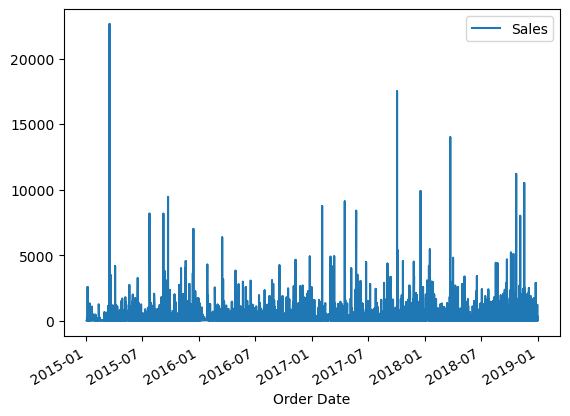

In [85]:
df_sales.plot()


In [86]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [87]:
test_result=adfuller(df_sales['Sales'])

In [88]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
   


In [89]:
adfuller_test(df['Sales'])

ADF Test Statistic : -97.90248289041071
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 9701
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [90]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [91]:
adfuller_test(df_sales['Sales'])

ADF Test Statistic : -97.90248289041071
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 9701
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [92]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#Autocorrelation(plot_acf),Partial Autocorrelation(plot_pacf)
import statsmodels.api as sm

In [93]:
df_monthly=df.copy()

df_monthly=df_monthly[['Order Date','Sales']]
df_monthly.head(5)

,Order Date,Sales
0,2017/11/8,261.9600
1,2017/11/8,731.9400
2,2017/6/12,14.6200
3,2016/10/11,957.5775
4,2016/10/11,22.3680


In [94]:
df_monthly['Order Date'] = pd.to_datetime(df_monthly['Order Date'])

df_monthly.head(5)
# df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'])
# df_copy.set_index('Order Date', inplace=True)

# # Resample the data to monthly frequency and sum the sales for each month in the copy
# df_monthly = df_copy['Sales'].resample('M').sum()

,Order Date,Sales
0,2017-11-08,261.9600
1,2017-11-08,731.9400
2,2017-06-12,14.6200
3,2016-10-11,957.5775
4,2016-10-11,22.3680


In [95]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9702 entries, 0 to 9701
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9702 non-null   datetime64[ns]
 1   Sales       9702 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 151.7 KB


In [99]:
df_monthly.set_index('Order Date',inplace=True)
df_monthly.head()
# df_monthly_sales = df_monthly['Sales'].resample('M').sum()
# df_monthly_sales.head(5)

# Resample the data to monthly frequency and sum the sales for each month in the copy


# df_monthly_sales_1 = df_monthly_sales['Sales'].resample('M').sum()
# df_monthly_sales_1.head(5)

,Sales
Order Date,
2017-11-08,261.9600
2017-11-08,731.9400
2017-06-12,14.6200
2016-10-11,957.5775
2016-10-11,22.3680


In [100]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9702 entries, 2017-11-08 to 2016-01-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   9702 non-null   float64
dtypes: float64(1)
memory usage: 151.6 KB


In [101]:

df_Monthly_Sales = df_monthly['Sales'].resample('M').sum()
df_Monthly_Sales.head()
# # Create a copy of the DataFrame to preserve the original data
# df_copy = df.copy()

# # Convert the 'Order Date' column to datetime and set it as the index in the copy
# df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'])
# df_copy.set_index('Order Date', inplace=True)

# # Resample the data to monthly frequency and sum the sales for each month in the copy
# df_monthly = df_copy['Sales'].resample('M').sum()


Order Date
2015-01-31    14205.707
2015-02-28     4503.716
2015-03-31    55049.657
2015-04-30    27906.855
2015-05-31    23564.831
Freq: M, Name: Sales, dtype: float64

In [102]:
df_Monthly_Sales.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 48 entries, 2015-01-31 to 2018-12-31
Freq: M
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


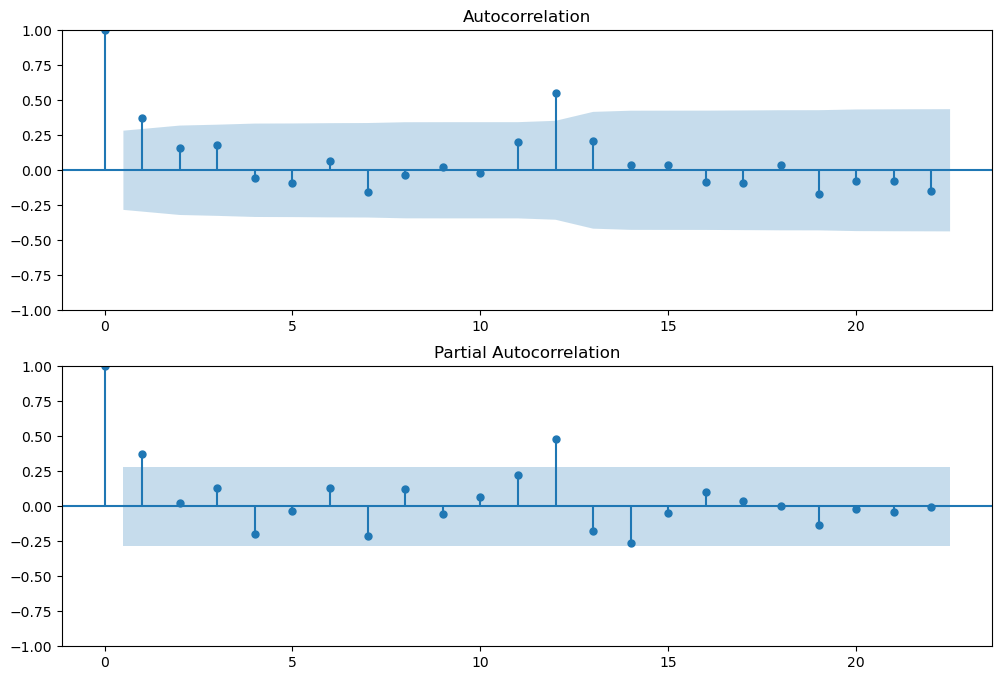

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df_Monthly_Sales, lags=22, ax=ax1)
plot_pacf(df_Monthly_Sales, lags=22, ax=ax2)

plt.show()


In [103]:
# For non-seasonal data
#p=12, d=1, q=12 
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.arima_model import ARIMA

In [104]:
model=ARIMA(df_Monthly_Sales,order=(12,1,12))
model_fit=model.fit()

C:\Users\wei\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\wei\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [105]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:               ARIMA(12, 1, 12)   Log Likelihood                -533.131
Date:                Tue, 02 Jul 2024   AIC                           1116.263
Time:                        11:54:46   BIC                           1162.516
Sample:                    01-31-2015   HQIC                          1133.668
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0852      4.588      0.019      0.985      -8.908       9.078
ar.L2         -0.1699      3.931     -0.043      0.966      -7.875       7.535
ar.L3          0.1021      4.552      0.022      0.982      -8.820       9.024
ar.L4         -0.2856      3.160     -0.090      0.928      -6.479       5.908
ar.L5          0.1236      4.126      0.030      0.976      -7.964       8.211
ar.L6          0.1697      4.150      0.041      0.967      -7.963       8.303
ar.L7         -0.1385      3.538     -0.039      0.969      -7.074       6.797
ar.L8          0.1374      3.531      0.039      0.969      -6.784       7.059
ar.L9         -0.1913      3.473     -0.055      0.956      -6.998       6.615
ar.L10         0.1090      4.519      0.024      0.981      -8.748       8.966
ar.L11        -0.2449      3.034     -0.081      0.936      -6.191       5.701
ar.L12         0.5225      2.954      0.177      0.860      -5.266       6.311
ma.L1         -0.6235      4.925     -0.127      0.899     -10.277       9.030
ma.L2          0.1207      2.553      0.047      0.962      -4.883       5.125
ma.L3         -0.1047      3.429     -0.031      0.976      -6.825       6.616
ma.L4          0.1143      2.503      0.046      0.964      -4.792       5.020
ma.L5         -0.3837      3.443     -0.111      0.911      -7.132       6.365
ma.L6         -0.0797      2.927     -0.027      0.978      -5.817       5.658
ma.L7          0.1271      1.898      0.067      0.947      -3.593       3.847
ma.L8         -0.0298      2.695     -0.011      0.991      -5.311       5.251
ma.L9          0.0173      4.213      0.004      0.997      -8.241       8.275
ma.L10         0.0026      2.743      0.001      0.999      -5.374       5.379
ma.L11         0.2314      3.272      0.071      0.944      -6.182       6.645
ma.L12        -0.1319      2.622     -0.050      0.960      -5.271       5.007
sigma2      7.268e+08   1.35e-07   5.38e+15      0.000    7.27e+08    7.27e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.80   Prob(JB):                         0.58
Heteroskedasticity (H):               0.55   Skew:                             0.33
Prob(H) (two-sided):                  0.24   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.91e+32. Standard errors may be unstable.
"""

In [106]:
df_Monthly_Sales.tail(10)


Order Date
2018-03-31     57684.0488
2018-04-30     35038.6901
2018-05-31     43690.5202
2018-06-30     47521.9477
2018-07-31     44825.1040
2018-08-31     62824.0880
2018-09-30     84726.3170
2018-10-31     77448.1312
2018-11-30    117666.8110
2018-12-31     82518.5458
Freq: M, Name: Sales, dtype: float64

In [107]:
df_Monthly_Sales=df_Monthly_Sales.to_frame()
# df_Monthly_Sales.to_frame()  wrong way

In [108]:
df_Monthly_Sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2015-01-31 to 2018-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


<Axes: xlabel='Order Date'>

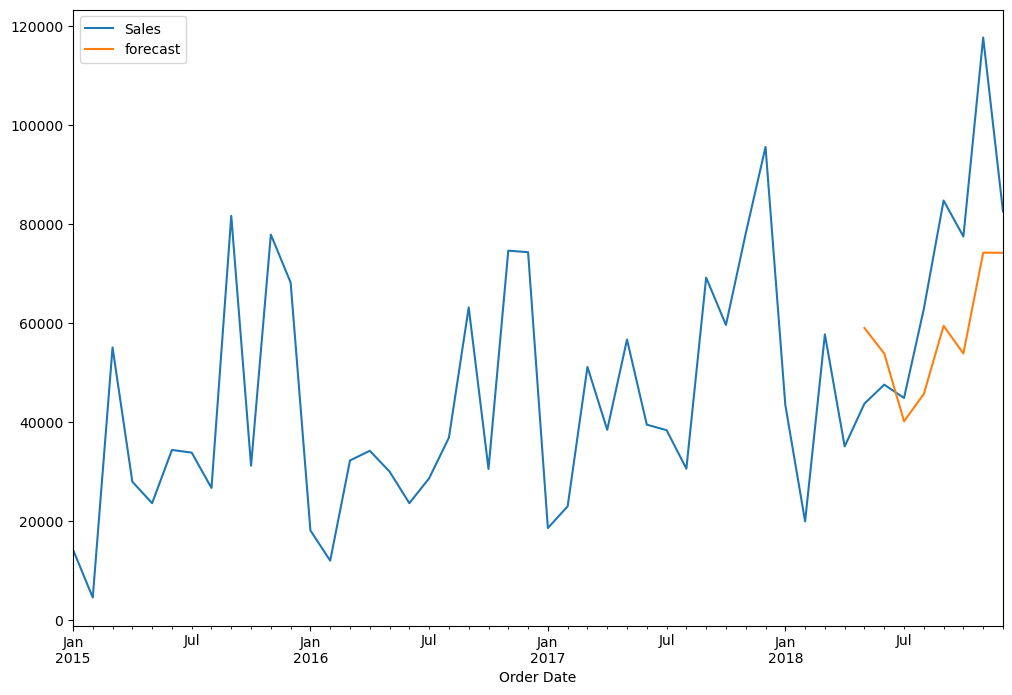

In [109]:
df_Monthly_Sales['forecast']=model_fit.predict(start=40,end=47,dynamic=True)
# df_Monthly_Sales['forecast'].plot(figsize=(12,8))
df_Monthly_Sales[['Sales','forecast']].plot(figsize=(12,8))

In [113]:
import statsmodels.api as sm          

In [122]:
model=sm.tsa.statespace.SARIMAX(df_Monthly_Sales['Sales'],order=(12, 1, 12),seasonal_order=(12,1,12,13))
results=model.fit()

C:\Users\wei\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\wei\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\wei\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [123]:
#predicting from index 40 to 47
df_Monthly_Sales['forecast']=results.predict(start=40,end=47,dynamic=True)


<Axes: xlabel='Order Date'>

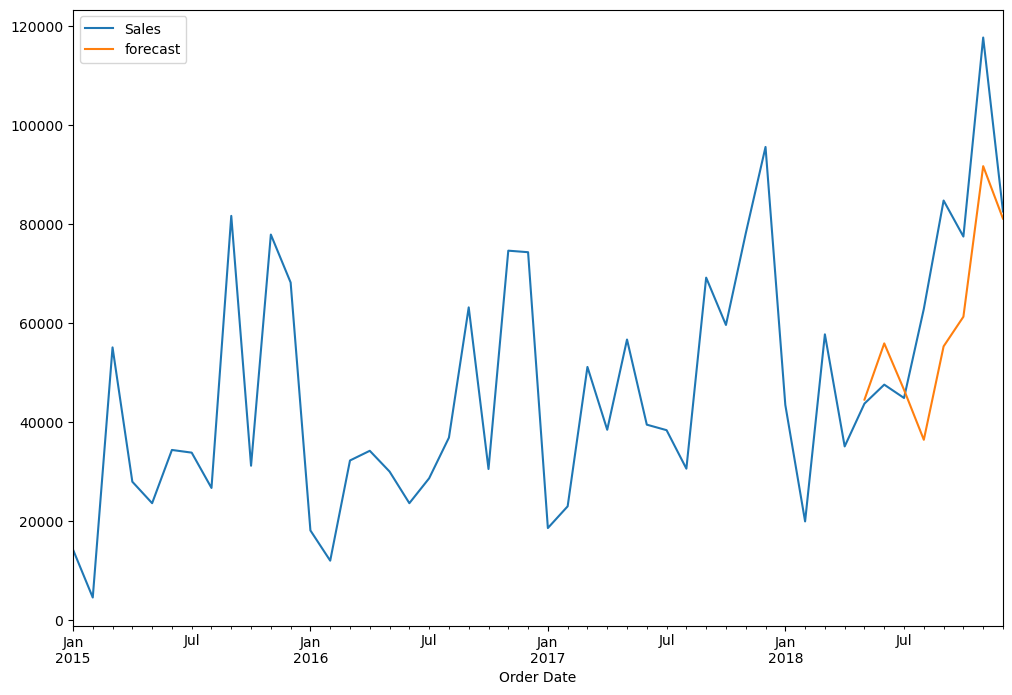

In [124]:
#blue line is original data anf orange is a forecasted data
df_Monthly_Sales[['Sales','forecast']].plot(figsize=(12,8))